In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.linear_model  import Ridge 
from sklearn.linear_model  import Lasso 
boston = load_boston() 

In [2]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [3]:
df['price'] = boston.target

In [4]:
df 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
df2 = df.sort_values(by='price')

In [6]:
df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
398,38.35180,0.0,18.10,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
405,67.92080,0.0,18.10,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
400,25.04610,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
399,9.91655,0.0,18.10,0.0,0.693,5.852,77.8,1.5004,24.0,666.0,20.2,338.16,29.97,6.3
414,45.74610,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2.01019,0.0,19.58,0.0,0.605,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
195,0.01381,80.0,0.46,0.0,0.422,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
283,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 398 to 186
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 79.3 KB


In [8]:
df2.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

Text(0.5, 0, 'price')

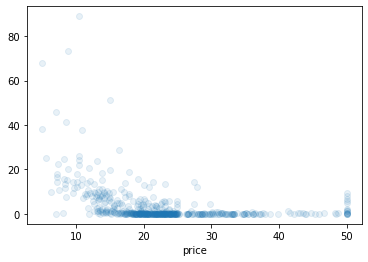

In [32]:
plt.scatter(df2.price, df2.CRIM, alpha=0.1)
plt.xlabel('price')

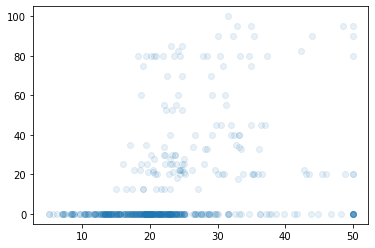

In [34]:
plt.scatter(df2.price, df2.ZN, alpha=.1)

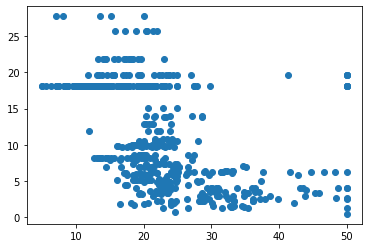

In [11]:
plt.scatter(df2.price, df2.INDUS)

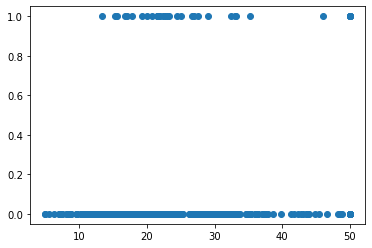

In [12]:
plt.scatter(df2.price, df2.CHAS)

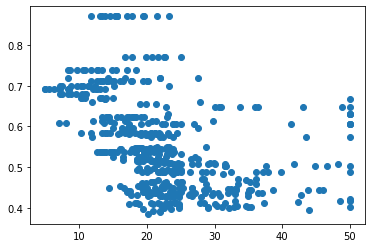

In [13]:
plt.scatter(df2.price, df2.NOX)

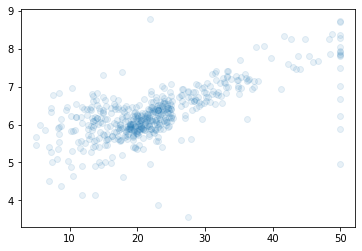

In [33]:
plt.scatter(df2.price, df2.RM, alpha=0.1)

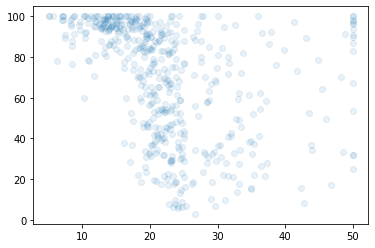

In [31]:
plt.scatter(df2.price, df2.AGE, alpha=0.1)

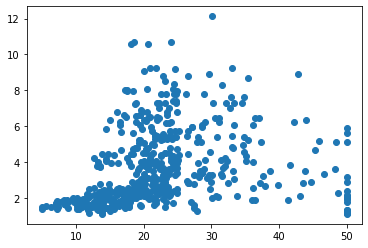

In [16]:
plt.scatter(df2.price, df2.DIS)

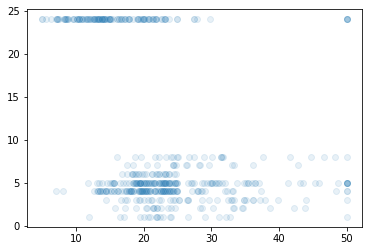

In [52]:
plt.scatter(df2.price, df2.RAD, alpha=.1)

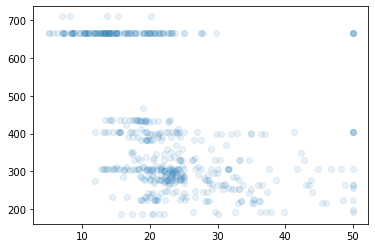

In [30]:
plt.scatter(df2.price, df2.TAX, alpha=0.1)

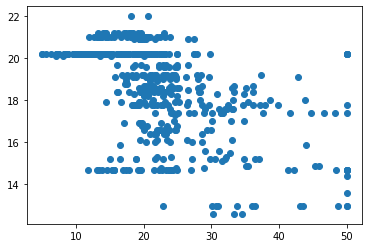

In [19]:
plt.scatter(df2.price, df2.PTRATIO)

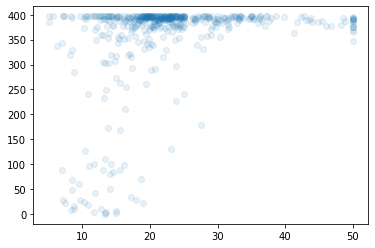

In [29]:
plt.scatter(df2.price, df2.B, alpha=0.1)

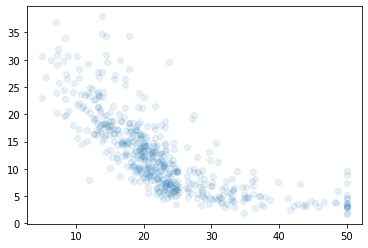

In [28]:
plt.scatter(df2.price, df2.LSTAT, alpha=0.1)

In [26]:
plt.scatter?

In [84]:
x = df2[['CRIM', 'LSTAT', 'RM', 'ZN', 'RAD', 'TAX']]

In [85]:
y = df2.price

In [86]:
pd.concat([x,y], axis=1)

,CRIM,LSTAT,RM,ZN,RAD,TAX,price
398,38.35180,30.59,5.453,0.0,24.0,666.0,5.0
405,67.92080,22.98,5.683,0.0,24.0,666.0,5.0
400,25.04610,26.77,5.987,0.0,24.0,666.0,5.6
399,9.91655,29.97,5.852,0.0,24.0,666.0,6.3
414,45.74610,36.98,4.519,0.0,24.0,666.0,7.0
...,...,...,...,...,...,...,...
166,2.01019,3.70,7.929,0.0,5.0,403.0,50.0
195,0.01381,2.97,7.875,80.0,4.0,255.0,50.0
283,0.01501,3.16,7.923,90.0,1.0,198.0,50.0
225,0.52693,4.63,8.725,0.0,8.0,307.0,50.0


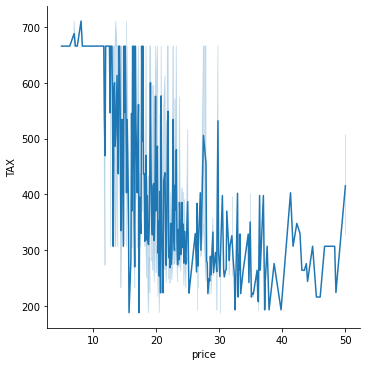

In [71]:
sns.relplot(x=df2.price, y=df2.TAX, kind='line')

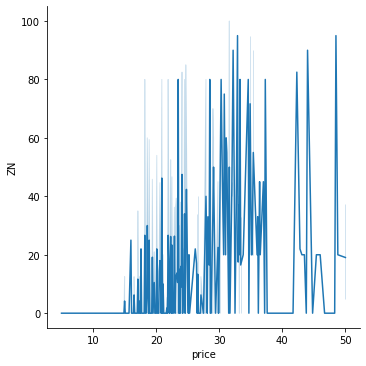

In [72]:
sns.relplot(x=df2.price, y=df2.ZN, kind='line')

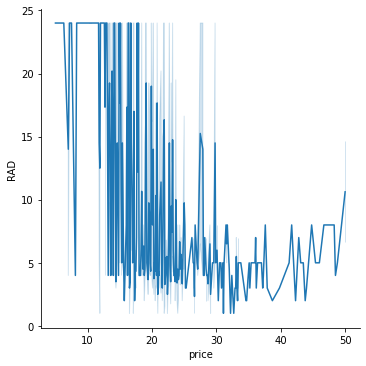

In [73]:
sns.relplot(x=df2.price, y=df2.RAD, kind='line')

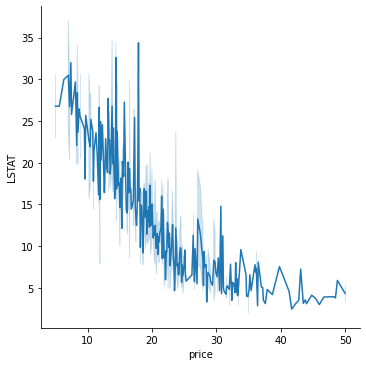

In [74]:
sns.relplot(x=df2.price, y=df2.LSTAT, kind='line')

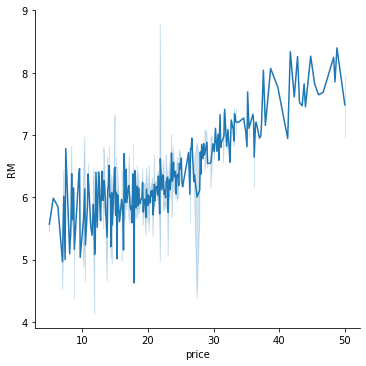

In [75]:
sns.relplot(x=df2.price, y=df2.RM, kind='line')

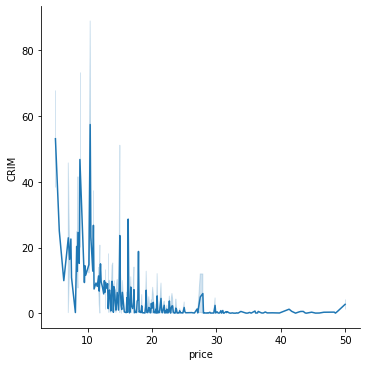

In [76]:
sns.relplot(x=df2.price, y=df2.CRIM, kind='line')

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [78]:
def train(model, model_name):
    model.fit(x_train, y_train)
    model_train_score = model.score(x_train, y_train)
    model_test_score = model.score(x_test, y_test) 
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

# Linear Regression

In [87]:
lreg = LinearRegression()
train(lreg, 'Linear Regression')

Linear Regression model score on Training data: 68.1721539081328%
Linear Regression model score on Testing data: 72.16776765841533%


# Lasso

In [88]:
las = Lasso()
train(las, 'Lasso')

Lasso model score on Training data: 64.90003175859367%
Lasso model score on Testing data: 64.73445668943731%


# Ridge

In [89]:
Ri = Ridge()
train(Ri, 'Ridge')

Ridge model score on Training data: 68.17180779475036%
Ridge model score on Testing data: 72.11914382040729%


# Random Forest

In [90]:
rf = RandomForestRegressor()
train(rf, 'Random Forest')

Random Forest model score on Training data: 97.72583335635936%
Random Forest model score on Testing data: 84.6324802956265%


# Decision Tree

In [93]:
DT = DecisionTreeRegressor()
train(DT, 'Decision Tree')

Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 43.433501666445004%
